<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#There-are-two-Probabilities:-Prob(Experiment)-and-Prob(Control)." data-toc-modified-id="There-are-two-Probabilities:-Prob(Experiment)-and-Prob(Control).-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>There are two Probabilities: Prob(Experiment) and Prob(Control).</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#NICE-outline" data-toc-modified-id="NICE-outline-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>NICE outline</a></span></li></ul></li></ul></li></ul></div>

In [6]:
## KEEP

import numpy as np
import pandas as pd

import zipfile

zip_file = "archive.zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Zip file corrupt")

Extracted all


In [7]:
## KEEP

filename = "AdSmartABdata - AdSmartABdata.csv"
df = pd.read_csv(filename)

print(df.columns)

#  Date Range
print(min(df['date']), max(df['date']))

print('Shape = ', df.shape)

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')
2020-07-03 2020-07-10
Shape =  (8077, 9)


In [8]:
# KEEP

# group by ab_date
df_date = df.groupby('date')['date'].count()
print(df_date)

date
2020-07-03    2015
2020-07-04     903
2020-07-05     890
2020-07-06     490
2020-07-07     480
2020-07-08    1198
2020-07-09    1208
2020-07-10     893
Name: date, dtype: int64


(array([18446., 18447., 18448., 18449., 18450., 18451., 18452., 18453.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

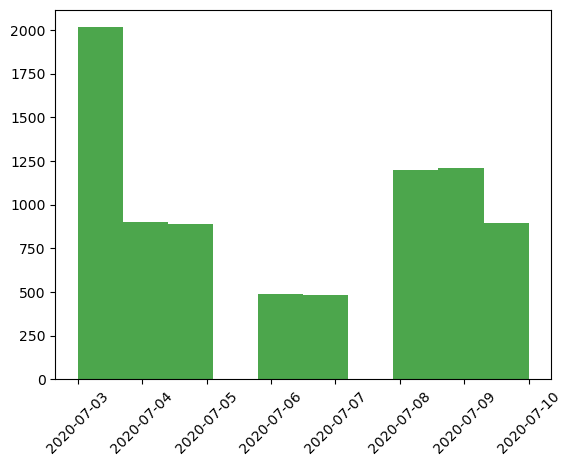

In [24]:
# Implementation of matplotlib function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

df[["date"]] = df[["date"]].apply(pd.to_datetime)

plt.hist(df[["date"]], color ='green', alpha = 0.7)
plt.xticks(rotation=45)

In [27]:
# group the data
df_hour = df.groupby('hour')['hour'].count()
#print(df_hour)

df_hour

hour
0      194
1      222
2      230
3      266
4      281
5      302
6      327
7      381
8      394
9      346
10     336
11     282
12     278
13     290
14     319
15    1895
16     335
17     263
18     273
19     227
20     264
21     206
22     135
23      31
Name: hour, dtype: int64

(array([ 4., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  31. ,  217.4,  403.8,  590.2,  776.6,  963. , 1149.4, 1335.8,
        1522.2, 1708.6, 1895. ]),
 <BarContainer object of 10 artists>)

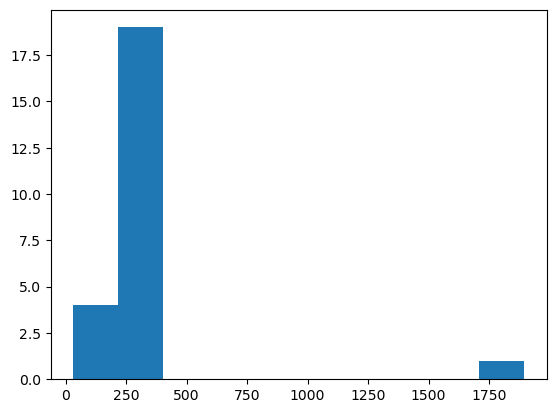

In [26]:
df = pd.DataFrame(df)
    
plt.hist(df_hour)

In [12]:
df_device_make = df.groupby('device_make')['device_make'].count()
print(df_device_make)

device_make
5008Y_EEA            1
5099Y                1
6039Y                1
A0001                2
ALE-L21              1
                  ... 
XiaoMi Redmi S2      1
YAL-L21              3
iPhone             433
moto e5 play         4
moto e5 plus         1
Name: device_make, Length: 269, dtype: int64


In [13]:
df_device_make.sort_values(ascending = False)

device_make
Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
Samsung SM-A700F         1
Samsung SM-A750GN        1
Samsung SM-A908B         1
Samsung SM-C9000         1
moto e5 plus             1
Name: device_make, Length: 269, dtype: int64

In [14]:
df_platform_os = df.groupby('platform_os')['platform_os'].count()
print(df_platform_os)

platform_os
5     428
6    7648
7       1
Name: platform_os, dtype: int64


In [15]:
df_platform_os.sort_values(ascending = False)

platform_os
6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [16]:
df_browser = df.groupby('browser')['browser'].count()
df_browser

browser
Android                          1
Chrome                           3
Chrome Mobile                 4554
Chrome Mobile WebView         1489
Chrome Mobile iOS               51
Edge Mobile                      1
Facebook                       764
Firefox Mobile                   1
Mobile Safari                  337
Mobile Safari UI/WKWebView      44
Opera Mini                       1
Opera Mobile                     3
Pinterest                        3
Puffin                           1
Samsung Internet               824
Name: browser, dtype: int64

In [17]:
top_ten_browser = df_browser.sort_values(ascending = False).head(10)
top_ten_browser

browser
Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Opera Mobile                     3
Pinterest                        3
Name: browser, dtype: int64

In [18]:
df_experiment = df.groupby('experiment')['experiment'].count()
print(df_experiment)

experiment
control    4071
exposed    4006
Name: experiment, dtype: int64


In [19]:
NO GOOD
df_auction_id = df.groupby('auction_id')['auction_id'].count()
print(df_auction_id)

SyntaxError: invalid syntax (738730012.py, line 1)

In [28]:
# Filter out users that were not interacting
relevant_rows = df.query('yes == 1 | no == 1')

# Divide a dataframe by exposed and control group
exposed = relevant_rows.query('experiment == "exposed"')
control = relevant_rows.query('experiment == "control"')

# Calculate a number of observation in both groups
print('The exposed group dataframe has {} observations'. format(exposed.shape[0]))
print('The control group dataframe has {} observations'. format(control.shape[0]))

contr_d1 = '{0:.2f}%'.format(exposed.yes.mean()*100)
trtm_d1 = '{0:.2f}%'.format(control.yes.mean()*100)
print('The conversion rate in the exposed group is equal to {}'.format(contr_d1))
print('The conversion rate in the exposed group is equal to {}'.format(trtm_d1))

The exposed group dataframe has 657 observations
The control group dataframe has 586 observations
The conversion rate in the exposed group is equal to 46.88%
The conversion rate in the exposed group is equal to 45.05%


In [30]:
obs_diff = exposed.yes.mean() - control.yes.mean()
obs_diff_form = '{0:.2f}%'.format(obs_diff*100)
print('The difference in conversion rates between the treatment group and the control group is {}'.format(obs_diff_form))


The difference in conversion rates between the treatment group and the control group is 1.83%


### There are two Probabilities: Prob(Experiment) and Prob(Control).

We want to compare:
    
a) **Click thru rate(Experiment)**  Vs b) **Click thru rate(Control)**

I would state it this way. (But this is NOT the only way.)

**Prob(Yes|Exp) = counts(Yes|Exp) / (counts(Yes|Exp) + counts(No|Exp))**

VS

**Prob(Yes|Ctl) = counts(Yes|Ctl) / (counts(Yes|Ctl) + counts(No|Ctl))**

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

plotPerColumnDistribution(df1, 10, 5)

NameError: name 'plotPerColumnDistribution' is not defined

In [1]:
# hour masing-masing kelompok
hour = df.groupby('experiment')['hour'].sum()
print(hour)
hour.plot.pie(autopct='%1.1f%%')


#time series 
time_series = data_baru.groupby('date')['hour'].sum()
time_series.plot()



NameError: name 'df' is not defined

In [ ]:

# Word Cloud in Python

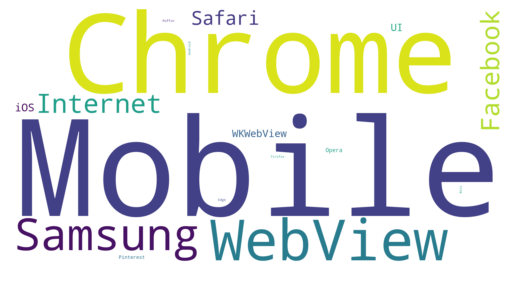

In [4]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

filename = "AdSmartABdata - AdSmartABdata.csv"
df = pd.read_csv(filename)

# creating the text variable
text1 = " ".join(title for title in df.browser)### chagne title to device_make and browser

# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists

In [ ]:
Fisher Exact Test 

Fisher’s Exact Test is used to determine whether or not there is a significant association between two categorical variables. It is typically used as an alternative to the Chi-Square Test of Independence when one or more of the cell counts in a 2×2 table is less than 5. 

Fisher’s Exact Test uses the following null and alternative hypotheses:

    H0: (null hypothesis) The two variables are independent.
    H1: (alternative hypothesis) The two variables are not independent.


In [ ]:
# Ref :- https://www.reneshbedre.com/blog/fisher-exact-test-python.html

# create a pandas dataframe with row and column names 
import pandas as pd
df = pd.DataFrame({'drug A':[80, 50], 'drug B':[48, 70]}, index=pd.Index(['no disease', 'disease']))
df

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

df_dict = {('drug A', 'no disease'): 80, ('drug A', 'disease'): 50, ('drug B', 'no disease'): 48, 
           ('drug B', 'disease'): 70}
mosaic(df_dict)  
plt.show()

In [ ]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(table=df.to_numpy(), alternative='two-sided')
oddsr, p


In [ ]:
# importing packages
import scipy.stats as stats
  
# creating data
data = [[2, 8], [7, 3]]
  
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

- AB Testing Eamples
- https://www.kaggle.com/code/tammyrotem/ab-tests-with-python
Invariate Metrics - Sanity Checks  - good tables

had variance = p*(1-p)/n GOOD

TO DO: calculate POWER with numbers in dataset

TO DO: Calc mean and sd and confidence intevals for 95%

TO Do: 'Daily traffic', table of 'Date 	Pageviews 	Clicks 	Enrollments 	Payments'

to do: look at differnt phones and os, time of day

- number of pageviews in control: 345543
- number of Pageviewsin experiment: 344660


You should answer the following questions in your presentation:

    How would you define the hypothesis of this A/B test?
    Can we conclude statistically significant results?
    Which statistical test did you use, and why?
    Based on your answer to Question 2, what would be your recommendation to client?

Hints:

    Your presentation should last about 15 minutes, and should be presented in English.
    The ultimate success metric for HotelsForYou.com is Number of Purchases. Therefore, you should focus on Purchase metrics for statistical testing.
    Explain the concept of statistical testing for a non-technical audience.
    The customer journey for this campaign is:
        User sees an ad (Impression)
        User clicks on the website link on the ad (Website Click)
        User makes a search on the website (Search)
        User views details of a product (View Content)
        User adds the product to the cart (Add to Cart)
        User purchases the product (Purchase)
    Use visualizations to compare test and control group metrics, such as Website Click Through Rate, Cost per Action, and Conversion Rates in addition to Purchase numbers.
    If you see trends, anomalies or other patterns, discuss these in your presentation.
    You can make assumptions if needed.


- BREAK down experiment and controls into yes/no and visits.

- print(control.info())
- print(test.info())


- Website Click Through Rate (CTR)


- test for normality
Normality Assumption (Shapiro Test) ~ (Normallik Varsayimi)
    H0: Normal distribution assumption is provided.
    H1: ... not provided.


ok https://www.kaggle.com/code/mathchi/ab-test-for-real-data/notebook


===========================================================

https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing
##### NICE outline
Import Libraries1
Load Data2
Summary Stats3
Outliers4
Some Details5
A/B Testing6
Conclusion

 A/B Testing

 Assumptions:

    Check normality
    If Normal Distribution, check homogeneity

Steps:

    Split & Define Control Group & Test Group
    Apply Shapiro Test for normality
    If parametric apply Levene Test for homogeneity of variances
    If Parametric + homogeneity of variances apply T-Test
    If Parametric - homogeneity of variances apply Welch Test
    If Non-parametric apply Mann Whitney U Test directly
    
==========================================================================

- NICE simple OUTLINE

https://www.kaggle.com/code/kanberburak/ab-testing

Sections

    Set up the Hypothesis
    Assumption Check
        2.1 Normality Assumption
        2.2 Variance Homogeneity
    Implementation of the Hypothesis
        HO red if p-value < 0.05
        Independent two-sample t-test (parametric test) if assumptions are met
        Mannwhitneyu test if assumptions are not provided (non-parametric test)
===============================================================


https://www.kaggle.com/code/tammyrotem/ab-tests-with-python

EXCELLENT TABLES

EX organization and stats run
=-=============================


https://www.kaggle.com/code/babyoda/a-b-testing-in-practice

has * A/B Testing Cheat Sheet *


USED color text nicely

=========================================================

MD

https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax


Here is a simple footnote[^1].

[^1]: My reference.